In [1]:
from PlantReactivityAnalysis.config import FEATURES_LETTERS_DIR, FIGURES_DIR, FEATURES_ONE_SEC_DIR, EXPERIMENT_DIR
from PlantReactivityAnalysis.visualization.visualize import export_df_to_image_formatted, plot_confusion_matrix
from PlantReactivityAnalysis.data.get_data_for_model import get_data_for_model_by_question
from PlantReactivityAnalysis.models.experiment import Experiment

In [2]:
import numpy as np
import ast
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Read Experiment Results

In [3]:
file_path = EXPERIMENT_DIR / "experiment_results.csv"
df = pd.read_csv(file_path)
df.shape

(3276, 11)

In [4]:
df.head()

,model_name,parameters,f1,accuracy,precision,recall,confusion_matrix,RQ,Window Size,Hop Length,Correlation Treshold
0,randomforest,"{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}",0.715664,0.716435,0.718809,0.716435,[[574 290]\n [200 664]],1,1.0,0.5,0.7
1,randomforest,"{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}",0.724773,0.725694,0.728759,0.725694,[[577 287]\n [187 677]],1,1.0,0.5,0.7
2,randomforest,"{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}",0.719489,0.720486,0.723665,0.720486,[[571 293]\n [190 674]],1,1.0,0.5,0.7
3,randomforest,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}",0.719489,0.720486,0.723665,0.720486,[[571 293]\n [190 674]],1,1.0,0.5,0.7
4,randomforest,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}",0.716444,0.717593,0.721178,0.717593,[[565 299]\n [189 675]],1,1.0,0.5,0.7


# RQ1

## Best Accuracy by Model

In [5]:
filtered_df = df[df['RQ'] == 1]
idx = filtered_df.groupby('model_name')['accuracy'].idxmax()
best_combinations = filtered_df.loc[idx]
columns= ['model_name','f1', 'accuracy', 'precision', 'recall']
best_combinations= best_combinations[columns]
column_names= ['Model','F1', 'Accuracy', 'Precision', 'Recall']
best_combinations.columns= column_names
best_combinations.head(10)

,Model,F1,Accuracy,Precision,Recall
1298,adaboost,0.713397,0.715278,0.721083,0.715278
155,extratrees,0.725075,0.725694,0.727746,0.725694
162,gaussiannb,0.453119,0.526042,0.555808,0.526042
1285,gradientboosting,0.738875,0.739583,0.742211,0.739583
41,kneighbors,0.517854,0.517940,0.517953,0.517940
1310,lgbm,0.748755,0.749421,0.752096,0.749421
630,randomforest,0.733731,0.734375,0.736666,0.734375
1322,xgb,0.738145,0.739005,0.742184,0.739005


In [6]:
idx = filtered_df.groupby('model_name')['accuracy'].idxmax()
best_combinations = filtered_df.loc[idx]
columns= ['model_name', 'Window Size', 'Hop Length', 'Correlation Treshold', 'parameters']
best_combinations= best_combinations[columns]
column_names= ['Model', 'Window Size', 'Hop Length', 'Correlation Treshold', 'Model Parameters']
best_combinations.columns= column_names
best_comb_rq = {}
best_comb_rq[1]= best_combinations
best_combinations.head(10)

,Model,Window Size,Hop Length,Correlation Treshold,Model Parameters
1298,adaboost,2.0,1.0,0.9,"{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42}"
155,extratrees,1.0,1.0,0.7,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}"
162,gaussiannb,1.0,1.0,0.7,{'var_smoothing': 1e-10}
1285,gradientboosting,2.0,1.0,0.9,"{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}"
41,kneighbors,1.0,0.5,0.7,"{'n_neighbors': 5, 'weights': 'uniform'}"
1310,lgbm,2.0,1.0,0.9,"{'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 64, 'random_state': 42}"
630,randomforest,1.0,1.0,0.8,"{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}"
1322,xgb,2.0,1.0,0.9,"{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'random_state': 42}"


## Best Model

In [7]:
index_of_best_accuracy = filtered_df['accuracy'].idxmax()
best_accuracy_row = filtered_df.loc[index_of_best_accuracy]
param_best_accuracy = best_accuracy_row.to_dict()
print(best_accuracy_row)

model_name                                                                                           lgbm
parameters              {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 64, 'random_state': 42}
f1                                                                                               0.748755
accuracy                                                                                         0.749421
precision                                                                                        0.752096
recall                                                                                           0.749421
confusion_matrix                                                                  [[603 261]\n [172 692]]
RQ                                                                                                      1
Window Size                                                                                           2.0
Hop Length                                    

In [8]:
def process_params(params):
    ct = params['Correlation Treshold']
    rq = params['RQ']
    rqs = [rq]
    parameters = params['parameters']
    param_combination = ast.literal_eval(parameters)
    model = params['model_name']
    return ct, rq, rqs, param_combination, model

In [9]:
ct, rq, rqs, param_combination, model= process_params(param_best_accuracy)
file_path = FEATURES_LETTERS_DIR / "features_dataset_norm_letters_ws2_hl1.0.pkl"
datasets= get_data_for_model_by_question(file_path, rqs, ct)
train_df, test_df = datasets[rq]

Dataset loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\processed\segmented_by_letters\features_dataset_norm_letters_ws2_hl1.0.pkl. Shape: (8878, 187)
Removing columns with NaN values: ['kurtosis', 'skewness']

# Research Question:  1
-Train distribution-
Counts and Percentages:
Class 0: Count = 3481, Percentage = 50.38%
Class 1: Count = 3429, Percentage = 49.62%
-Test distribution-
Counts and Percentages:
Class 1: Count = 864, Percentage = 50.00%
Class 0: Count = 864, Percentage = 50.00%
Reduced variable features from initial count to 76.
                                         1             0        p_value
delta mfcc_2_std              7.311498e-01  1.089196e+00   0.000000e+00
delta mfcc_1_std              2.111153e+01  3.228017e+01   0.000000e+00
mfcc_1_std                    1.619132e+01  2.508420e+01   0.000000e+00
mfcc_2_std                    5.524780e-01  8.416388e-01   0.000000e+00
mfcc_4_std                    1.371039e-01  1.763555e-01   0.000000

In [10]:
experiment = Experiment(train_df, test_df)
experiment.train_and_evaluate_model(model_name= model, param_combination= param_combination)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3429, number of negative: 3481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19124
[LightGBM] [Info] Number of data points in the train set: 6910, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496237 -> initscore=-0.015051
[LightGBM] [Info] Start training from score -0.015051
Metrics for lgbm with params {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 64, 'random_state': 42}              : F1: 0.7487548114328004, Accuracy: 0.7494212962962963, Precision: 0.7520962664590597, Recall: 0.7494212962962963


In [11]:
param_best_accuracy['confusion_matrix']

'[[603 261]\n [172 692]]'

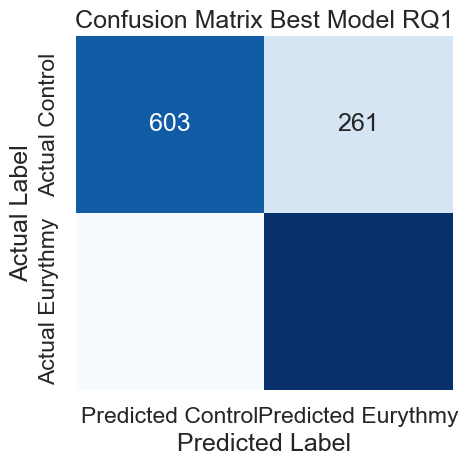

In [12]:
cm = np.array([[603,261],[172,692]])
plot_confusion_matrix(cm, title='Confusion Matrix Best Model RQ1',xticklabels=['Predicted Control','Predicted Eurythmy'],
                      yticklabels=['Actual Control', 'Actual Eurythmy'])

# RQ2

## Best Accuracy by Model

In [13]:
filtered_df = df[df['RQ'] == 2]
idx = filtered_df.groupby('model_name')['accuracy'].idxmax()
best_combinations = filtered_df.loc[idx]
columns= ['model_name','f1', 'accuracy', 'precision', 'recall']
best_combinations= best_combinations[columns]
column_names= ['Model','F1', 'Accuracy', 'Precision', 'Recall']
best_combinations.columns= column_names
best_combinations.head(10)

,Model,F1,Accuracy,Precision,Recall
1235,adaboost,0.438793,0.439227,0.441472,0.439227
1098,extratrees,0.434937,0.439227,0.436259,0.439227
1233,gaussiannb,0.418604,0.418508,0.419201,0.418508
1222,gradientboosting,0.453625,0.458564,0.453921,0.458564
108,kneighbors,0.373377,0.375691,0.375027,0.375691
1122,lgbm,0.432006,0.435083,0.430682,0.435083
1075,randomforest,0.444395,0.447514,0.443453,0.447514
1256,xgb,0.453441,0.455801,0.452967,0.455801


In [14]:
idx = filtered_df.groupby('model_name')['accuracy'].idxmax()
best_combinations = filtered_df.loc[idx]
columns= ['model_name', 'Window Size', 'Hop Length', 'Correlation Treshold', 'parameters']
best_combinations= best_combinations[columns]
column_names= ['Model', 'Window Size', 'Hop Length', 'Correlation Treshold', 'Model Parameters']
best_combinations.columns= column_names
best_comb_rq[2]= best_combinations
best_combinations.head(10)

,Model,Window Size,Hop Length,Correlation Treshold,Model Parameters
1235,adaboost,1.0,1.0,0.9,"{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42}"
1098,extratrees,1.0,0.5,0.9,"{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}"
1233,gaussiannb,1.0,1.0,0.9,{'var_smoothing': 1e-10}
1222,gradientboosting,1.0,1.0,0.9,"{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}"
108,kneighbors,1.0,0.5,0.7,"{'n_neighbors': 15, 'weights': 'uniform'}"
1122,lgbm,1.0,0.5,0.9,"{'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 31, 'random_state': 42}"
1075,randomforest,1.0,0.5,0.9,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}"
1256,xgb,1.0,1.0,0.9,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}"


In [15]:
col_widths = [0.05, 0.05, 0.05, 0.05, 0.2, 0.05, 0.05, 0.05, 0.05] 
#export_df_to_image_formatted(best_combinations, FIGURES_DIR/'models_performance_rq2.png', figsize=(10,20), col_widths=col_widths,  font_size=100)

## Best Model

In [16]:
filtered_df = df[df['RQ'] == 2]
index_of_best_accuracy = filtered_df['accuracy'].idxmax()
best_accuracy_row = filtered_df.loc[index_of_best_accuracy]
param_best_accuracy = best_accuracy_row.to_dict()
print(best_accuracy_row)

model_name                                                                              gradientboosting
parameters              {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}
f1                                                                                              0.453625
accuracy                                                                                        0.458564
precision                                                                                       0.453921
recall                                                                                          0.458564
confusion_matrix                                         [[ 95  68  88]\n [ 49 142  42]\n [ 72  73  95]]
RQ                                                                                                     2
Window Size                                                                                          1.0
Hop Length                                             

In [17]:
ct, rq, rqs, param_combination, model= process_params(param_best_accuracy)
file_path = FEATURES_LETTERS_DIR / "features_dataset_norm_letters_ws1_hl1.pkl"
datasets= get_data_for_model_by_question(file_path, rqs, ct)
train_df, test_df = datasets[rq]

Dataset loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\processed\segmented_by_letters\features_dataset_norm_letters_ws1_hl1.pkl. Shape: (8878, 187)
Removing columns with NaN values: ['kurtosis', 'skewness']

# Research Question:  2
-Train distribution-
Counts and Percentages:
Class 0: Count = 965, Percentage = 33.37%
Class 1: Count = 964, Percentage = 33.33%
Class 2: Count = 963, Percentage = 33.30%
-Test distribution-
Counts and Percentages:
Class 0: Count = 251, Percentage = 34.67%
Class 2: Count = 240, Percentage = 33.15%
Class 1: Count = 233, Percentage = 32.18%
Reduced variable features from initial count to 71.
                                         1             0             2  \
cepstra_1_avg                 5.501436e-01  5.978387e-01  5.489052e-01   
cepstra_2_avg                 5.051347e-01  5.479406e-01  5.041055e-01   
cepstra_3_avg                 4.547189e-01  4.918721e-01  4.513704e-01   
cepstra_4_avg                 4.347120e-01  4.70455

In [18]:
experiment = Experiment(train_df, test_df)
experiment.train_and_evaluate_model(model_name= model, param_combination= param_combination)

Metrics for gradientboosting with params {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}              : F1: 0.453625332256142, Accuracy: 0.4585635359116022, Precision: 0.4539205975541948, Recall: 0.4585635359116022


C:\Users\alvar\anaconda3\envs\Plant-Reactivity-Analysis\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [19]:
param_best_accuracy['confusion_matrix']

'[[ 95  68  88]\n [ 49 142  42]\n [ 72  73  95]]'

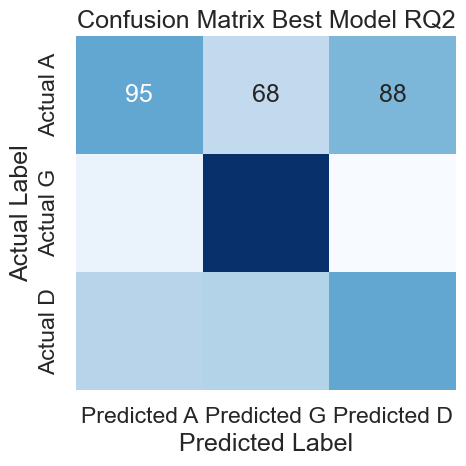

In [20]:
cm = np.array([[95,68,88],[49,142,42],[72,73,95]])
plot_confusion_matrix(cm, title='Confusion Matrix Best Model RQ2',xticklabels=['Predicted A','Predicted G','Predicted D'],
                      yticklabels=['Actual A', 'Actual G', 'Actual D'])

# RQ5

## Best Accuracy by Model

In [21]:
filtered_df = df[df['RQ'] == 5]
idx = filtered_df.groupby('model_name')['accuracy'].idxmax()
best_combinations = filtered_df.loc[idx]
columns= ['model_name','f1', 'accuracy', 'precision', 'recall']
best_combinations= best_combinations[columns]
column_names= ['Model','F1', 'Accuracy', 'Precision', 'Recall']
best_combinations.columns= column_names
best_combinations.head(10)

,Model,F1,Accuracy,Precision,Recall
3190,adaboost,0.413649,0.418005,0.418555,0.418005
3179,extratrees,0.422491,0.429966,0.435450,0.429966
3249,gaussiannb,0.275897,0.367031,0.387028,0.367031
3171,gradientboosting,0.494918,0.498118,0.500476,0.498118
3191,kneighbors,0.338227,0.351492,0.344342,0.351492
3200,lgbm,0.484999,0.486828,0.488105,0.486828
3164,randomforest,0.447380,0.453441,0.460016,0.453441
3208,xgb,0.505096,0.508403,0.510755,0.508403


## Best Accuracy by Model

In [22]:
filtered_df = df[df['RQ'] == 5]
index_of_best_accuracy = filtered_df['accuracy'].idxmax()
best_accuracy_row = filtered_df.loc[index_of_best_accuracy]
param_best_accuracy = best_accuracy_row.to_dict()
print(best_accuracy_row)

model_name                                                                                          xgb
parameters              {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'random_state': 42}
f1                                                                                             0.505096
accuracy                                                                                       0.508403
precision                                                                                      0.510755
recall                                                                                         0.508403
confusion_matrix                               [[5079 3182 1415]\n [2464 5467 1322]\n [2513 2297 3098]]
RQ                                                                                                    5
Window Size                                                                                         0.2
Hop Length                                                      

In [23]:
idx = filtered_df.groupby('model_name')['accuracy'].idxmax()
best_combinations = filtered_df.loc[idx]
columns= ['model_name', 'Window Size', 'Hop Length', 'Correlation Treshold', 'parameters']
best_combinations= best_combinations[columns]
column_names= ['Model', 'Window Size', 'Hop Length', 'Correlation Treshold', 'Model Parameters']
best_combinations.columns= column_names
best_comb_rq[5]= best_combinations
best_combinations.head(10)

,Model,Window Size,Hop Length,Correlation Treshold,Model Parameters
3190,adaboost,0.2,0.1,0.8,"{'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42}"
3179,extratrees,0.2,0.1,0.8,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}"
3249,gaussiannb,0.2,0.2,0.8,{'var_smoothing': 1e-10}
3171,gradientboosting,0.2,0.1,0.8,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}"
3191,kneighbors,0.2,0.1,0.8,"{'n_neighbors': 5, 'weights': 'uniform'}"
3200,lgbm,0.2,0.1,0.8,"{'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 64, 'random_state': 42}"
3164,randomforest,0.2,0.1,0.8,"{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}"
3208,xgb,0.2,0.1,0.8,"{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'random_state': 42}"


## Best Model

In [24]:
filtered_df = df[df['RQ'] == 5]
index_of_best_accuracy = filtered_df['accuracy'].idxmax()
best_accuracy_row = filtered_df.loc[index_of_best_accuracy]
param_best_accuracy = best_accuracy_row.to_dict()
print(best_accuracy_row)

model_name                                                                                          xgb
parameters              {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'random_state': 42}
f1                                                                                             0.505096
accuracy                                                                                       0.508403
precision                                                                                      0.510755
recall                                                                                         0.508403
confusion_matrix                               [[5079 3182 1415]\n [2464 5467 1322]\n [2513 2297 3098]]
RQ                                                                                                    5
Window Size                                                                                         0.2
Hop Length                                                      

In [25]:
ct, rq, rqs, param_combination, model= process_params(param_best_accuracy)
file_path = FEATURES_ONE_SEC_DIR / "features_dataset_norm_1s_ws0.2_hl0.1.pkl"
datasets= get_data_for_model_by_question(file_path, rqs, ct)
train_df, test_df = datasets[rq]

Dataset loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\processed\segmented_by_one_second\features_dataset_norm_1s_ws0.2_hl0.1.pkl. Shape: (148682, 188)
Removing columns with NaN values: ['kurtosis', 'skewness']

# Research Question:  5


C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\src\PlantReactivityAnalysis\data\preparation_eurythmy_data.py:470: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "plant"] = df["plant"].replace(plant_mapping).astype(int)


-Train distribution-
Counts and Percentages:
Class 0: Count = 38380, Percentage = 35.75%
Class 1: Count = 36791, Percentage = 34.27%
Class 2: Count = 32174, Percentage = 29.97%
-Test distribution-
Counts and Percentages:
Class 0: Count = 9676, Percentage = 36.05%
Class 1: Count = 9253, Percentage = 34.48%
Class 2: Count = 7908, Percentage = 29.47%
Reduced variable features from initial count to 60.
                                         0             1             2  \
spectral_centroid_mean        7.124553e-02  7.510277e-02  7.376006e-02   
cepstra_13_std                6.102881e-01  5.130160e-01  6.187397e-01   
cepstra_12_std                6.126506e-01  5.170154e-01  6.202736e-01   
cepstra_11_std                6.121317e-01  5.196528e-01  6.185231e-01   
delta mfcc_4_std              1.688374e-01  1.760540e-01  1.636481e-01   
chroma_7_mean                 3.689399e-02  4.041673e-02  4.033618e-02   
zero_crossing_rate            5.402944e-05  6.246636e-05  2.341176e-04   
delta 

In [26]:
experiment = Experiment(train_df, test_df)
experiment.train_and_evaluate_model(model_name= model, param_combination= param_combination)

Metrics for xgb with params {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'random_state': 42}              : F1: 0.5050963121922322, Accuracy: 0.5084025785296419, Precision: 0.5107548169942433, Recall: 0.5084025785296419


In [27]:
param_best_accuracy['confusion_matrix']

'[[5079 3182 1415]\n [2464 5467 1322]\n [2513 2297 3098]]'

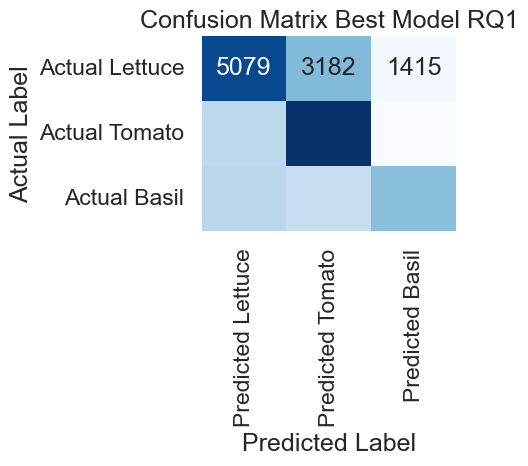

In [28]:
cm = np.array([[5079,3182,1415],[2464,5467,1322],[2513,2297,3098]])
plot_confusion_matrix(cm, title='Confusion Matrix Best Model RQ1',xticklabels=['Predicted Lettuce','Predicted Tomato','Predicted Basil'],
                      yticklabels=['Actual Lettuce', 'Actual Tomato', 'Actual Basil'])

# Best Parameters

In [30]:
for key, df in best_comb_rq.items():
    df['hypothesis'] = key

parameters_df = pd.concat(best_comb_rq.values(), ignore_index=True)
parameters_df.head(30)

,Model,Window Size,Hop Length,Correlation Treshold,Model Parameters,hypothesis
0,adaboost,2.0,1.0,0.9,"{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42}",1
1,extratrees,1.0,1.0,0.7,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}",1
2,gaussiannb,1.0,1.0,0.7,{'var_smoothing': 1e-10},1
3,gradientboosting,2.0,1.0,0.9,"{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}",1
4,kneighbors,1.0,0.5,0.7,"{'n_neighbors': 5, 'weights': 'uniform'}",1
5,lgbm,2.0,1.0,0.9,"{'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 64, 'random_state': 42}",1
6,randomforest,1.0,1.0,0.8,"{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}",1
7,xgb,2.0,1.0,0.9,"{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'random_state': 42}",1
8,adaboost,1.0,1.0,0.9,"{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42}",2
9,extratrees,1.0,0.5,0.9,"{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}",2
